Episode  1, epsilon   0.82, batch size   66, ep return 8703843.6
Episode  2, epsilon   0.62, batch size  133, ep return 7977003.6
Episode  3, epsilon   0.43, batch size  200, ep return 11345591.9
Episode  4, epsilon   0.23, batch size  266, ep return 11273603.3
Episode  5, epsilon   0.03, batch size  333, ep return 5496365.0
Episode  6, epsilon   0.01, batch size  400, ep return 4801903.0
Episode  7, epsilon   0.01, batch size  466, ep return 3439003.7
Episode  8, epsilon   0.01, batch size  533, ep return 3439128.8
Episode  9, epsilon   0.01, batch size  600, ep return 3439262.0
Episode 10, epsilon   0.01, batch size  666, ep return 3434084.4
Episode 11, epsilon   0.01, batch size  733, ep return 3208373.2
Episode 12, epsilon   0.01, batch size  800, ep return 3238007.5
Episode 13, epsilon   0.01, batch size  866, ep return 4631155.4
Episode 14, epsilon   0.01, batch size  933, ep return 4588885.9
Episode 15, epsilon   0.01, batch size 1000, ep return 5179497.3
Episode 16, epsilon   0

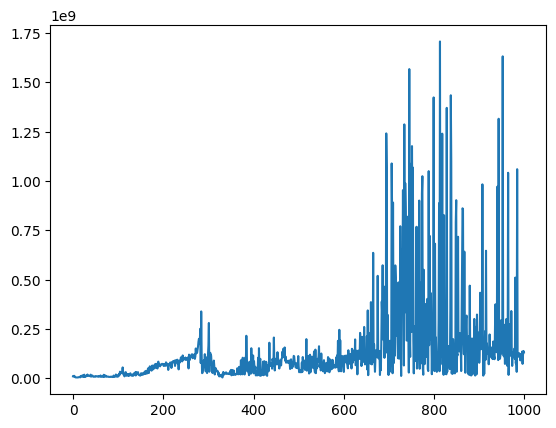

In [1]:
import train
import env_hiv 
import torch
# DQN config

pagent = train.ProjectAgent()
res = pagent.train()
import matplotlib.pyplot as plt
plt.plot(res[0])
pagent.save('')

In [9]:
import pickle
import numpy as np
import torch
import torch.nn as nn
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer

hsize = 256
class Agent(nn.Module):
    def __init__(self, envs):
        super().__init__()
        self.critic = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), hsize)),
            nn.Tanh(),
            layer_init(nn.Linear(hsize, hsize)),
            nn.Tanh(),
            layer_init(nn.Linear(hsize, 1), std=1.0),
        )
        self.actor = nn.Sequential(
            layer_init(nn.Linear(np.array(envs.single_observation_space.shape).prod(), hsize)),
            nn.Tanh(),
            layer_init(nn.Linear(hsize, hsize)),
            nn.Tanh(),
            layer_init(nn.Linear(hsize, envs.single_action_space.n), std=0.01),
        )

    def get_value(self, x):
        return self.critic(x)

    def get_action_and_value(self, x, action=None):
        logits = self.actor(x)
        probs = Categorical(logits=logits)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action), probs.entropy(), self.critic(x)
with open('saved.pkl', 'rb') as f:  # open a text file
            saved = pickle.load( f)

In [21]:
serialized ={"dqn" : saved['dqn'].actor}
with open('saved.pkl', 'wb') as f:  # open a text file
    pickle.dump(serialized, f) # serialize the list